In [236]:
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
import numpy as np

from slsim.Sources.source import Source
from slsim.Deflectors.deflector import Deflector
from slsim.lens import Lens
from slsim.LOS.los_individual import LOSIndividual
from slsim.image_simulation import simulate_image, rgb_image_from_image_list

## Source and Deflector configurations

In [237]:
# define a cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

In [238]:
# Source dict. You can also proviide magnitude in single band. This source dict is
# valid for single sersic_ellipse light profile.
source_dict = {
    "z": 1.0,
    "angular_size": 0.10887651129362959,  # effective radius of a source in arcsec
    "mag_VIS": 23.1, # VIS-band magnitude of a source
    "mag_F062": 23.0, # F062-band magnitude of a source
    "mag_F129": 23.0, # F087-band magnitude of a source
    "mag_F106": 23.0, # F106-band magnitude of a source
    "mag_g": 23.5,  # g-band magnitude of a source
    "mag_r": 23,  # r-band magnitude of a source
    "mag_i": 23.2,  # i-band magnitude of a source
    "mag_z": 23.1,  # z-band magnitude of a source
    "mag_y": 23.0,  # y-band magnitude of a source
    "e1": 0.0,  # tangential component of the ellipticity
    "e2": 0.0,  # cross component of the ellipticity
    "n_sersic": 1.5547096361698418,  # sersic index for sersic_ellipse profile
    "center_x": 0.056053505877290584,  # x-position of the center of a source
    "center_y": -0.08071283196326566,  # y-position of the center of a source
}

# Deflector dict. You can also provide magnitude in single band. This deflector dict is
# valid for elliptical power law model.
deflector_dict = {
    "z": 0.5,
    "angular_size": 0.09604418906529916,  # effective radius of the deflector in arcsec
    "mag_VIS": 20.5, # VIS-band magnitude of a deflector
    "mag_F062":20.0, # F062-band magnitude of a deflector
    "mag_F129":20.0, # F087-band magnitude of a deflector
    "mag_F106":20.0, # F106-band magnitude of a deflector
    "mag_g": 21.0,  # g-band magnitude of a deflector
    "mag_r": 20.0,  # r-band magnitude of a deflector
    "mag_i": 19.5,  # i-band magnitude of a deflector
    "mag_z": 19.0,  # z-band magnitude of a deflector
    "mag_y": 18.5,  # y-band magnitude of a deflector
    "theta_E": 1.0,  # Einstein radius of the deflector
    "e1_light": 0.09096489106609575,  # tangential component of the light ellipticity
    "e2_light": 0.1489400739802363,  # cross component of the light ellipticity
    "e1_mass": 0.1082427319496781,  # tangential component of the mass ellipticity
    "e2_mass": 0.10051583213026649,  # cross component of the mass ellipticity
    "gamma_pl": 2.0,  # power law slope in elliptical power law mass model
    "n_sersic": 2.4362388918558664,  # sersic index of a sersic_ellipse profile of a deflector
    "center_x": 0.10039720005025651,  # x-position of the center of the lens
    "center_y": -0.0002092046265491892,  # y-position of the center of the lens
}

In [239]:
source = Source(
    source_dict=source_dict,
    cosmo=cosmo,
    source_type="extended",
    extendedsource_type="single_sersic",
)
deflector = Deflector(
    deflector_type="EPL",
    deflector_dict=deflector_dict,
)
los_class = LOSIndividual(kappa=0, gamma=[-0.005061965833762263, 0.028825761226555197])

In [240]:
# This is your lens. it contains all the information about your lensing configuration.
lens_class = Lens(
    source_class=source, deflector_class=deflector, cosmo=cosmo, los_class=los_class
)

## Euclid Single Lens Simulation

In [241]:
euclid_vis_image = simulate_image(
    lens_class=lens_class,
    observatory="Euclid",
    band="VIS",
    num_pix=61,
    add_noise=True,
)

d:\Programming\Anaconda3\envs\slsim_env\lib\site-packages\lenstronomy\LensModel\lens_model.py:96: UserWarning: Astropy Cosmology is provided. Make sure your cosmology model is consistent with the cosmology_model argument.
  warnings.warn(


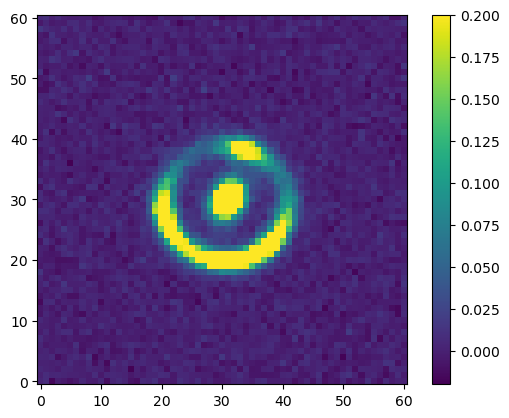

In [242]:
plt.imshow(euclid_vis_image, origin="lower", vmax=0.2)
plt.colorbar()

## LSST Single Lens Simulation

In [243]:
lsst_r_image = simulate_image(
    lens_class=lens_class,
    observatory="LSST",
    band="r",
    num_pix=41,
    add_noise=True,
)

lsst_i_image = simulate_image(
    lens_class=lens_class,
    observatory="LSST",
    band="i",
    num_pix=41,
    add_noise=True,
)

lsst_g_image = simulate_image(
    lens_class=lens_class,
    observatory="LSST",
    band="g",
    num_pix=41,
    add_noise=True,
)

In [244]:
lsst_rgb_image = rgb_image_from_image_list([lsst_i_image, lsst_r_image, lsst_g_image], stretch=2)

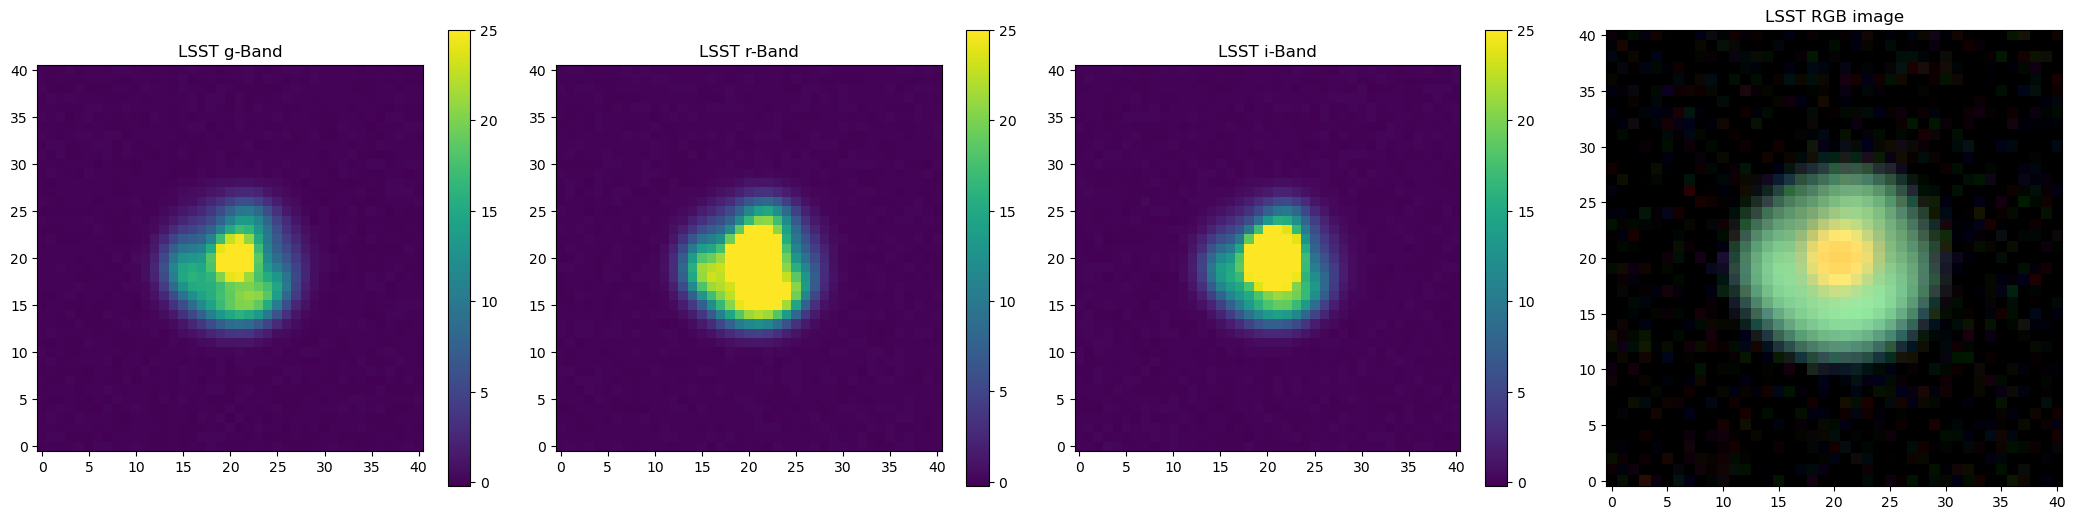

In [245]:
fig, axes = plt.subplots(1, 4, figsize=(21, 5))

im0 = axes[0].imshow(lsst_g_image, origin='lower', vmax=25)
axes[0].set_title('LSST g-Band')
fig.colorbar(im0, ax=axes[0])

im1 = axes[1].imshow(lsst_r_image, origin='lower', vmax=25)
axes[1].set_title('LSST r-Band')
fig.colorbar(im1, ax=axes[1])

im2 = axes[2].imshow(lsst_i_image, origin='lower', vmax=25)
axes[2].set_title('LSST i-Band')
fig.colorbar(im2, ax=axes[2])

im3 = axes[3].imshow(lsst_rgb_image, origin='lower')
axes[3].set_title('LSST RGB image')

plt.tight_layout()
plt.show()

## Roman Telescope Single Lens Simulation

In [246]:
roman_f062_image = simulate_image(
    lens_class=lens_class,
    observatory="Roman",
    band="F062",
    num_pix=61,
    add_noise=True,
)

roman_f106_image = simulate_image(
    lens_class=lens_class,
    observatory="Roman",
    band="F106",
    num_pix=61,
    add_noise=True,
)

roman_f129_image = simulate_image(
    lens_class=lens_class,
    observatory="Roman",
    band="F129",
    num_pix=61,
    add_noise=True,
)

In [247]:
roman_rgb_image = rgb_image_from_image_list([roman_f129_image, roman_f106_image, roman_f062_image], stretch=0.5)

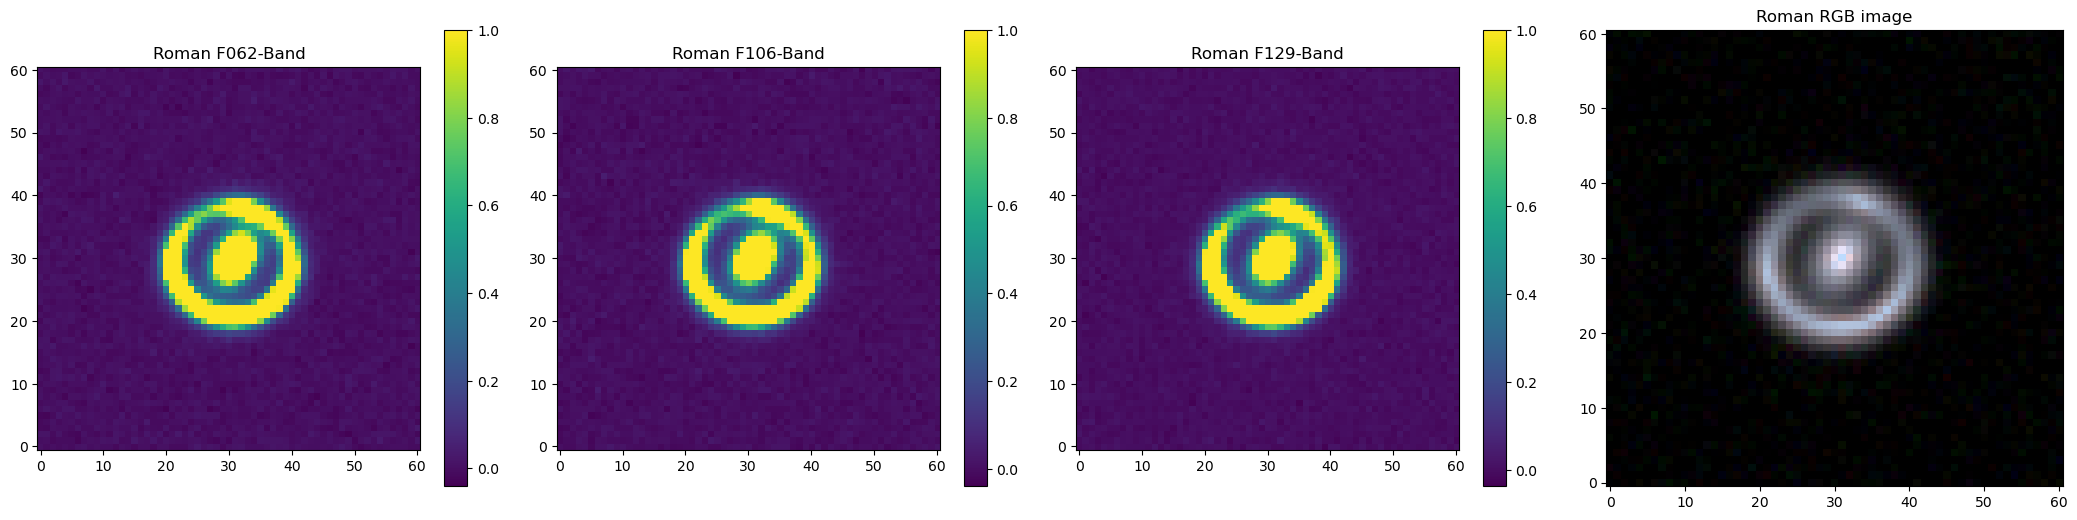

In [248]:
fig, axes = plt.subplots(1, 4, figsize=(21, 5))

im0 = axes[0].imshow(roman_f062_image, origin='lower', vmax=1)
axes[0].set_title('Roman F062-Band')
fig.colorbar(im0, ax=axes[0])

im1 = axes[1].imshow(roman_f106_image, origin='lower', vmax=1)
axes[1].set_title('Roman F106-Band')
fig.colorbar(im1, ax=axes[1])

im2 = axes[2].imshow(roman_f129_image, origin='lower', vmax=1)
axes[2].set_title('Roman F129-Band')
fig.colorbar(im2, ax=axes[2])

im3 = axes[3].imshow(roman_rgb_image, origin='lower', vmax=5)
axes[3].set_title('Roman RGB image')

plt.tight_layout()
plt.show()

## Comparision of different telescope

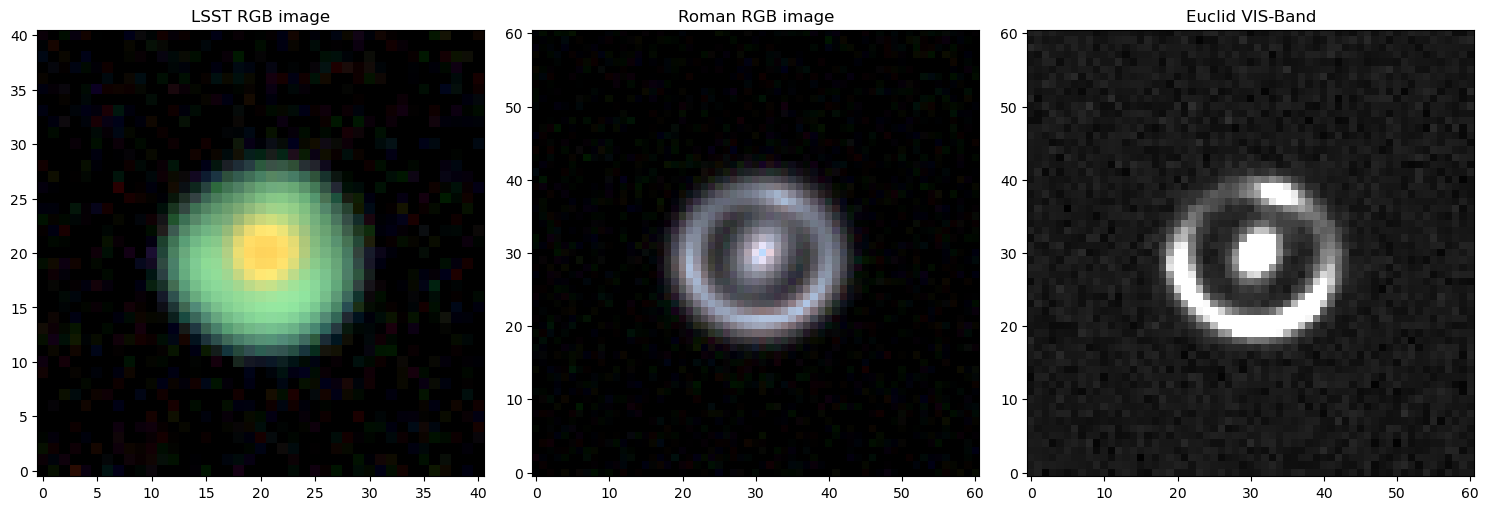

In [249]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

im0 = axes[0].imshow(lsst_rgb_image, origin='lower')
axes[0].set_title('LSST RGB image')

im1 = axes[1].imshow(roman_rgb_image, origin='lower', vmax=5)
axes[1].set_title('Roman RGB image')

im2 = axes[2].imshow(euclid_vis_image, origin='lower', vmax=0.2, cmap='gray')
axes[2].set_title('Euclid VIS-Band')

plt.tight_layout()
plt.show()